In [53]:
import pandas as pd


In [54]:
# Assuming 'Identifier' is the column name and 'L2_Distance' is the column with the distance values
subset_sizes = [10, 50, 100, 150, 200]

In [77]:
df_laplace01 = pd.read_csv('/Users/shafizurrahmanseeam/Desktop/ARR/AR_GPS_Sensor_Data/Perturbed_10/Laplace/merged_laplace_0.1.csv')
df_laplace01

,Latitude,Longitude,Identifier,Perturbed_Latitude,Perturbed_Longitude,Distance(meters),l1distance,l1_distance,l2_distance
0,39.644708,-104.881722,34,39.644909,-104.881962,30.365755,42.908410,42.908410,30.365713
1,39.644708,-104.881722,34,39.644719,-104.881714,1.339370,1.817772,1.817772,1.339368
2,39.644708,-104.881722,34,39.644777,-104.881633,10.771334,15.232931,15.232931,10.771319
3,39.642963,-104.878055,34,39.642664,-104.878059,33.169864,33.513998,33.513998,33.169818
4,39.642963,-104.878055,34,39.642930,-104.878165,10.081797,13.037409,13.037409,10.081783
...,...,...,...,...,...,...,...,...,...
725735,39.604401,-104.850768,334,39.604450,-104.850983,19.204009,23.857087,23.857087,19.203983
725736,39.604401,-104.850768,334,39.604549,-104.850849,17.822761,23.347987,23.347987,17.822736
725737,39.604401,-104.850768,334,39.604490,-104.850887,14.249090,20.148997,20.148997,14.249071
725738,39.604353,-104.850740,334,39.604457,-104.850707,11.916355,14.417864,14.417864,11.916339


In [78]:
  # Add more sizes as needed
averages_l2_laplace = {size: [] for size in subset_sizes}  # To store averages for each subset size
averages_l1_laplace = {size: [] for size in subset_sizes}  # To store averages for each subset size

for identifier, group in df_laplace01.groupby('Identifier'):
    for size in subset_sizes:
        if len(group) >= size:  # Check if the trajectory has enough points
            mean_distance_l2 = group['l2_distance'].iloc[:size].sum()
            averages_l2_laplace[size].append(mean_distance_l2)
            mean_distance_l1 = group['l1_distance'].iloc[:size].sum()
            averages_l1_laplace[size].append(mean_distance_l1)

# Now, calculate the overall average for each subset size across all trajectories
overall_averages_l2_laplace = {size: sum(values)/len(values) if values else None for size, values in averages_l2_laplace.items()}
overall_averages_l1_laplace = {size: sum(values)/len(values) if values else None for size, values in averages_l1_laplace.items()}

# Extracting just the values from the overall_averages dictionary
overall_averages_l2_laplace = list(overall_averages_l2_laplace.values())
overall_averages_l1_laplace = list(overall_averages_l1_laplace.values())
# This will be your list of overall averages
print(overall_averages_l2_laplace)
print(overall_averages_l1_laplace)


[178.87126314963572, 898.9912927101104, 1790.429317817725, 2682.290471819836, 3571.807257133217]
[226.9122393251248, 1141.1270614610219, 2271.7118167561607, 3404.0299537205537, 4533.244517883258]


In [79]:
df_staircase01 = pd.read_csv('/Users/shafizurrahmanseeam/Desktop/ARR/AR_GPS_Sensor_Data/Perturbed_10/Staircase/merged_staircase_0.1.csv')
df_staircase01

,Latitude,Longitude,Identifier,Perturbed_Latitude,Perturbed_Longitude,Distance(meters),l1distance,l1_distance,l2_distance
0,39.652550,-105.029267,317,39.652933,-105.029383,43.757400,52.521816,52.521816,43.757339
1,39.652550,-105.029267,317,39.652601,-105.029366,10.207320,14.164229,14.164229,10.207306
2,39.652550,-105.029267,317,39.652516,-105.029238,4.526384,6.264095,6.264095,4.526378
3,39.652550,-105.029267,317,39.652551,-105.029268,0.139313,0.194160,0.194160,0.139313
4,39.652442,-105.028049,317,39.652432,-105.028057,1.266255,1.740942,1.740942,1.266254
...,...,...,...,...,...,...,...,...,...
725735,32.884093,-117.234725,607,32.884059,-117.234874,14.419934,17.662476,17.662476,14.419914
725736,32.884091,-117.234726,607,32.884050,-117.234730,4.554766,4.923460,4.923460,4.554760
725737,32.884091,-117.234726,607,32.883939,-117.234697,17.088100,19.579024,19.579024,17.088076
725738,32.884091,-117.234726,607,32.884009,-117.234845,14.368413,20.215505,20.215505,14.368394


In [80]:
  # Add more sizes as needed
averages_l2_staircase = {size: [] for size in subset_sizes}  # To store averages for each subset size
averages_l1_staircase = {size: [] for size in subset_sizes}  # To store averages for each subset size

for identifier, group in df_staircase01.groupby('Identifier'):
    for size in subset_sizes:
        if len(group) >= size:  # Check if the trajectory has enough points
            mean_distance_l2 = group['l2_distance'].iloc[:size].sum()
            averages_l2_staircase[size].append(mean_distance_l2)
            mean_distance_l1 = group['l1_distance'].iloc[:size].sum()
            averages_l1_staircase[size].append(mean_distance_l1)

# Now, calculate the overall average for each subset size across all trajectories
overall_averages_l2_staircase = {size: sum(values)/len(values) if values else None for size, values in averages_l2_staircase.items()}
overall_averages_l1_staircase = {size: sum(values)/len(values) if values else None for size, values in averages_l1_staircase.items()}

# Extracting just the values from the overall_averages dictionary
overall_averages_l2_staircase = list(overall_averages_l2_staircase.values())
overall_averages_l1_staircase = list(overall_averages_l1_staircase.values())
# This will be your list of overall averages
print(overall_averages_l2_staircase)
print(overall_averages_l1_staircase)

[87.87357270455455, 444.49668530120175, 894.5974956965275, 1343.0792698785185, 1790.3203851278406]
[111.16656445784649, 563.429315039592, 1133.7223705715257, 1703.3076981972083, 2270.7869020072712]


In [81]:
df_our_bl_50delta5_01 = pd.read_csv('/Users/shafizurrahmanseeam/Desktop/ARR/AR_GPS_Sensor_Data/Perturbed_10/Our_bl_50_delta_5/merged_our_0.1.csv')
df_our_bl_50delta5_01

,Latitude,Longitude,Identifier,Perturbed_Latitude,Perturbed_Longitude,distance_x_z,l1distance,l1_distance,l2_distance
0,39.745675,-104.997178,559,39.745446,-104.997408,32.124668,45.066849,45.066849,32.124623
1,39.745675,-104.997178,559,39.745446,-104.997408,32.124668,45.066849,45.066849,32.124623
2,39.745675,-104.997178,559,39.745446,-104.997408,32.124668,45.066849,45.066849,32.124623
3,39.745675,-104.997178,559,39.745446,-104.997408,32.124668,45.066849,45.066849,32.124623
4,39.745675,-104.997178,559,39.745446,-104.997408,32.124668,45.066849,45.066849,32.124623
...,...,...,...,...,...,...,...,...,...
725735,39.535522,-104.871828,246,39.535538,-104.871773,5.061850,6.524992,6.524992,5.061843
725736,39.535522,-104.871828,246,39.535538,-104.871773,5.061850,6.524992,6.524992,5.061843
725737,39.535514,-104.871823,246,39.535538,-104.871773,5.045721,6.925083,6.925083,5.045714
725738,39.535514,-104.871823,246,39.535538,-104.871773,5.045721,6.925083,6.925083,5.045714


In [82]:
  # Add more sizes as needed
averages_l2_our_bl_50_delta_5 = {size: [] for size in subset_sizes}  # To store averages for each subset size
averages_l1_our_bl_50_delta_5 = {size: [] for size in subset_sizes}  # To store averages for each subset size

for identifier, group in df_our_bl_50delta5_01.groupby('Identifier'):
    for size in subset_sizes:
        if len(group) >= size:  # Check if the trajectory has enough points
            mean_distance_l2 = group['l2_distance'].iloc[:size].sum()
            averages_l2_our_bl_50_delta_5[size].append(mean_distance_l2)
            mean_distance_l1 = group['l1_distance'].iloc[:size].sum()
            averages_l1_our_bl_50_delta_5[size].append(mean_distance_l1)

# Now, calculate the overall average for each subset size across all trajectories
overall_averages_l2_our_bl_50_delta_5 = {size: sum(values)/len(values) if values else None for size, values in averages_l2_our_bl_50_delta_5.items()}
overall_averages_l1_our_bl_50_delta_5 = {size: sum(values)/len(values) if values else None for size, values in averages_l1_our_bl_50_delta_5.items()}

# Extracting just the values from the overall_averages dictionary
overall_averages_l2_our_bl_50_delta_5 = list(overall_averages_l2_our_bl_50_delta_5.values())
overall_averages_l1_our_bl_50_delta_5 = list(overall_averages_l1_our_bl_50_delta_5.values())
# This will be your list of overall averages
print(overall_averages_l2_our_bl_50_delta_5)
print(overall_averages_l1_our_bl_50_delta_5)

[145.15698144911184, 714.0061984000516, 1410.991306150215, 2075.553631520565, 2751.945454648815]
[185.23186935898656, 911.2675131810842, 1796.666256728508, 2640.6914394256764, 3500.748741735544]


In [83]:
df_laplaceDelta5_01= pd.read_csv('/Users/shafizurrahmanseeam/Desktop/ARR/AR_GPS_Sensor_Data/Perturbed_10/LaplaceDelta5/merged_LaplaceDelta5_0.1.csv')
df_laplaceDelta5_01

,Latitude,Longitude,Identifier,Perturbed_Latitude,Perturbed_Longitude,l1_distance,l2_distance
0,39.740649,-105.001142,107,39.740599,-105.001162,7.313941,5.803406
1,39.740649,-105.001142,107,39.740599,-105.001162,7.313941,5.803406
2,39.740649,-105.001142,107,39.740599,-105.001162,7.313941,5.803406
3,39.740324,-105.001381,107,39.740009,-105.001474,42.960131,35.926095
4,39.740324,-105.001381,107,39.740009,-105.001474,42.960131,35.926095
...,...,...,...,...,...,...,...
725735,32.874705,-117.242308,611,32.874659,-117.242652,37.231230,32.522435
725736,32.874705,-117.242308,611,32.874659,-117.242652,37.231230,32.522435
725737,32.874705,-117.242308,611,32.874659,-117.242652,37.231230,32.522435
725738,32.874705,-117.242308,611,32.874659,-117.242652,37.231230,32.522435


In [84]:
  # Add more sizes as needed
averages_l2_LaplaceDelta_5_01 = {size: [] for size in subset_sizes}  # To store averages for each subset size
averages_l1_LaplaceDelta_5_01 = {size: [] for size in subset_sizes}  # To store averages for each subset size

for identifier, group in df_laplaceDelta5_01.groupby('Identifier'):
    for size in subset_sizes:
        if len(group) >= size:  # Check if the trajectory has enough points
            mean_distance_l2 = group['l2_distance'].iloc[:size].sum()
            averages_l2_LaplaceDelta_5_01[size].append(mean_distance_l2)
            mean_distance_l1 = group['l1_distance'].iloc[:size].sum()
            averages_l1_LaplaceDelta_5_01[size].append(mean_distance_l1)

# Now, calculate the overall average for each subset size across all trajectories
overall_averages_l2_LaplaceDelta_5_01 = {size: sum(values)/len(values) if values else None for size, values in averages_l2_LaplaceDelta_5_01.items()}
overall_averages_l1_LaplaceDelta_5_01 = {size: sum(values)/len(values) if values else None for size, values in averages_l1_LaplaceDelta_5_01.items()}

# Extracting just the values from the overall_averages dictionary
overall_averages_l2_LaplaceDelta_5_01 = list(overall_averages_l2_LaplaceDelta_5_01.values())
overall_averages_l1_LaplaceDelta_5_01 = list(overall_averages_l1_LaplaceDelta_5_01.values())
# This will be your list of overall averages
print(overall_averages_l2_LaplaceDelta_5_01)
print(overall_averages_l1_LaplaceDelta_5_01)

[182.91168297621752, 941.3522453382338, 1867.8758301728637, 2782.4309755779486, 3706.0419978646496]
[230.9381455324164, 1192.3826723267114, 2366.289809933249, 3526.083489951191, 4698.860969855807]


'/Users/shafizurrahmanseeam/Desktop/ARR/AR_GPS_Sensor_Data/Code/untitled folder'

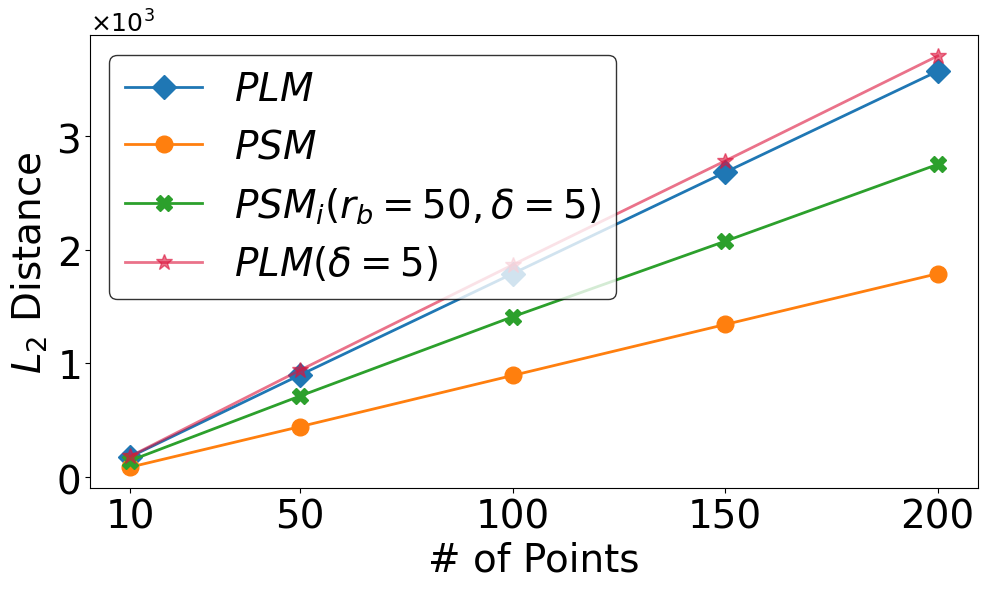

In [85]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker
# Example data (replace with your actual data)
epsilon_values = subset_sizes  #2CA02C


line1 = {'x': epsilon_values, 'y': overall_averages_l2_laplace, 'label': '$PLM$', 'color': '#1F77B4', 'marker': 'D', 'linestyle': 'solid', 'markersize': 12}
line2 = {'x': epsilon_values, 'y': overall_averages_l2_staircase, 'label': '$PSM$', 'color': '#FF7F0E', 'marker': 'o', 'linestyle': 'solid', 'markersize': 12}
line3 = {'x': epsilon_values, 'y': overall_averages_l2_our_bl_50_delta_5, 'label': '$PSM_i (r_b=50, \delta=5)$', 'color': '#2CA02C', 'marker': 'X', 'linestyle': 'solid', 'markersize': 12}
line4 = {'x': epsilon_values, 'y': overall_averages_l2_LaplaceDelta_5_01, 'label': '$PLM ( \delta=5)$', 'color': '#DC143C', 'marker': '*', 'linestyle': 'solid', 'markersize': 12}

#PSMᵢ
# Increase the figure size for better readability
plt.figure(figsize=(10, 6))
# Improved line styles and markers
plt.plot(line1['x'], line1['y'], label=line1['label'], color=line1['color'], marker=line1['marker'], linestyle=line1['linestyle'], linewidth=2,markersize=line1['markersize'])
plt.plot(line2['x'], line2['y'], label=line2['label'], color=line2['color'], marker=line2['marker'], linestyle=line2['linestyle'], linewidth=2,markersize=line1['markersize'])
plt.plot(line3['x'], line3['y'], label=line3['label'], color=line3['color'], marker=line3['marker'], linestyle=line3['linestyle'], linewidth=2,markersize=line1['markersize'])
plt.plot(line4['x'], line4['y'], label=line4['label'], color=line4['color'], marker=line4['marker'], linestyle=line4['linestyle'], linewidth=2,markersize=line1['markersize'], alpha=0.6)


# Log scale for x-axis and setting specific ticks and labels
plt.xlabel('# of Points', fontsize=28)
plt.ylabel('$L_2$ Distance', fontsize=28)
#plt.title('Geolife (Per Point)')
# Log scale for x-axis and setting specific ticks and labels
#plt.xscale('log')
plt.xticks(epsilon_values, labels=[str(val) for val in epsilon_values])
plt.tick_params(axis='both', which='major', labelsize=28)
# Adding legend
legend = plt.legend( fontsize=28, frameon=True)
#plt.legend(loc = 'upper left', fontsize=26)
frame = legend.get_frame()
#frame.set_color('black')  # Set the frame color
frame.set_edgecolor('black')  # Set the border color
frame.set_linewidth(1)  # Set the border width
# Show grid
#plt.grid(True, which="both", ls="--", color='gray', alpha=0.4)
plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.gca().yaxis.get_offset_text().set_size(18)
plt.tight_layout()

pathpng = '/Users/shafizurrahmanseeam/Desktop/ARR/AR_GPS_Sensor_Data/figure/png/ARR_L2Distance_e=0_1'
plt.savefig(pathpng, dpi=300, bbox_inches='tight')

# # Saving the plot as an SVG
#pathsvg = 'C:\\Users\\ss6365\\Desktop\\11111\\Geolife\\figure\\svg\\Geolife_L2Distance_e=1lower_trace_points'
#plt.savefig(pathsvg, format='svg', bbox_inches='tight')

#plt.gca().xaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

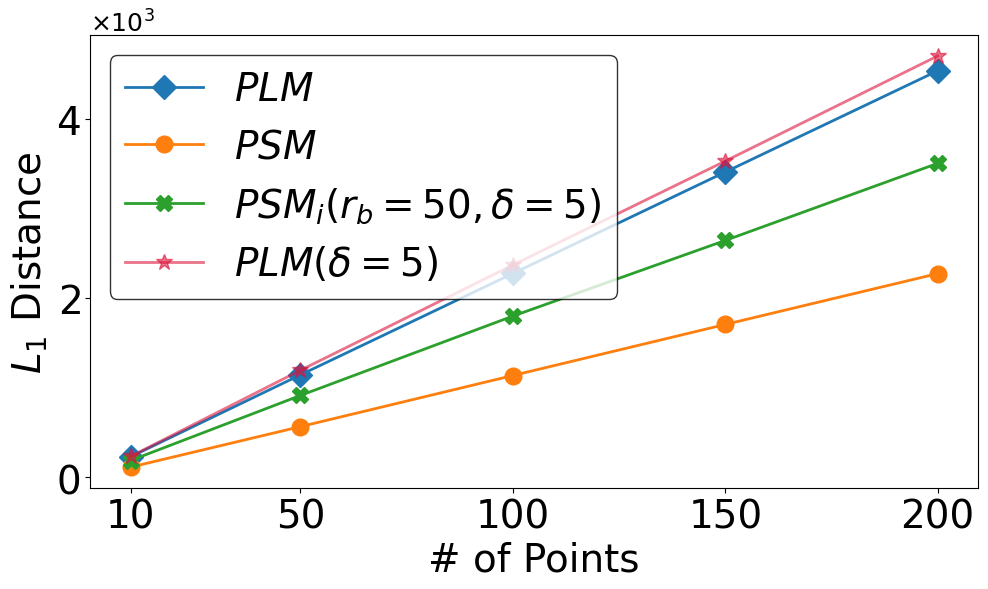

In [86]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker
# Example data (replace with your actual data)
epsilon_values = subset_sizes  #2CA02C


line1 = {'x': epsilon_values, 'y': overall_averages_l1_laplace, 'label': '$PLM$', 'color': '#1F77B4', 'marker': 'D', 'linestyle': 'solid', 'markersize': 12}
line2 = {'x': epsilon_values, 'y': overall_averages_l1_staircase, 'label': '$PSM$', 'color': '#FF7F0E', 'marker': 'o', 'linestyle': 'solid', 'markersize': 12}
line3 = {'x': epsilon_values, 'y': overall_averages_l1_our_bl_50_delta_5, 'label': '$PSM_i (r_b=50, \delta=5)$', 'color': '#2CA02C', 'marker': 'X', 'linestyle': 'solid', 'markersize': 12}
line4 = {'x': epsilon_values, 'y': overall_averages_l1_LaplaceDelta_5_01, 'label': '$PLM ( \delta=5)$', 'color': '#DC143C', 'marker': '*', 'linestyle': 'solid', 'markersize': 12}

#PSMᵢ
# Increase the figure size for better readability
plt.figure(figsize=(10, 6))
# Improved line styles and markers
plt.plot(line1['x'], line1['y'], label=line1['label'], color=line1['color'], marker=line1['marker'], linestyle=line1['linestyle'], linewidth=2,markersize=line1['markersize'])
plt.plot(line2['x'], line2['y'], label=line2['label'], color=line2['color'], marker=line2['marker'], linestyle=line2['linestyle'], linewidth=2,markersize=line1['markersize'])
plt.plot(line3['x'], line3['y'], label=line3['label'], color=line3['color'], marker=line3['marker'], linestyle=line3['linestyle'], linewidth=2,markersize=line1['markersize'])
plt.plot(line4['x'], line4['y'], label=line4['label'], color=line4['color'], marker=line4['marker'], linestyle=line4['linestyle'], linewidth=2,markersize=line1['markersize'], alpha=0.6)


# Log scale for x-axis and setting specific ticks and labels
plt.xlabel('# of Points', fontsize=28)
plt.ylabel('$L_1$ Distance', fontsize=28)
#plt.title('Geolife (Per Point)')
# Log scale for x-axis and setting specific ticks and labels
#plt.xscale('log')
plt.xticks(epsilon_values, labels=[str(val) for val in epsilon_values])
plt.tick_params(axis='both', which='major', labelsize=28)
# Adding legend
legend = plt.legend( fontsize=28, frameon=True)
#plt.legend(loc = 'upper left', fontsize=26)
frame = legend.get_frame()
#frame.set_color('black')  # Set the frame color
frame.set_edgecolor('black')  # Set the border color
frame.set_linewidth(1)  # Set the border width
# Show grid
#plt.grid(True, which="both", ls="--", color='gray', alpha=0.4)
plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.gca().yaxis.get_offset_text().set_size(18)
plt.tight_layout()

pathpng = '/Users/shafizurrahmanseeam/Desktop/ARR/AR_GPS_Sensor_Data/figure/png/ARR_L1Distance_e=0_1'
plt.savefig(pathpng, dpi=300, bbox_inches='tight')


# # Saving the plot as an SVG
#pathsvg = 'C:\\Users\\ss6365\\Desktop\\11111\\Geolife\\figure\\svg\\Geolife_L2Distance_e=1lower_trace_points'
#plt.savefig(pathsvg, format='svg', bbox_inches='tight')

#plt.gca().xaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

In [87]:
df_laplace1 = pd.read_csv('/Users/shafizurrahmanseeam/Desktop/ARR/AR_GPS_Sensor_Data/Perturbed_10/Laplace/merged_laplace_1.csv')
df_laplace1

  # Add more sizes as needed
averages_l2_laplace = {size: [] for size in subset_sizes}  # To store averages for each subset size
averages_l1_laplace = {size: [] for size in subset_sizes}  # To store averages for each subset size

for identifier, group in df_laplace1.groupby('Identifier'):
    for size in subset_sizes:
        if len(group) >= size:  # Check if the trajectory has enough points
            mean_distance_l2 = group['l2_distance'].iloc[:size].sum()
            averages_l2_laplace[size].append(mean_distance_l2)
            mean_distance_l1 = group['l1_distance'].iloc[:size].sum()
            averages_l1_laplace[size].append(mean_distance_l1)

# Now, calculate the overall average for each subset size across all trajectories
overall_averages_l2_laplace = {size: sum(values)/len(values) if values else None for size, values in averages_l2_laplace.items()}
overall_averages_l1_laplace = {size: sum(values)/len(values) if values else None for size, values in averages_l1_laplace.items()}

# Extracting just the values from the overall_averages dictionary
overall_averages_l2_laplace = list(overall_averages_l2_laplace.values())
overall_averages_l1_laplace = list(overall_averages_l1_laplace.values())
# This will be your list of overall averages
print(overall_averages_l2_laplace)
print(overall_averages_l1_laplace)


[17.950153923461833, 89.69927912310649, 179.5491884142419, 269.27086685112647, 359.0411842480922]
[22.77779850886917, 113.68790799720846, 227.66051755905855, 341.5042872569556, 455.3370078677478]


In [88]:
df_staircase1 = pd.read_csv('/Users/shafizurrahmanseeam/Desktop/ARR/AR_GPS_Sensor_Data/Perturbed_10/Staircase/merged_staircase_1.csv')
df_staircase1

  # Add more sizes as needed
averages_l2_staircase = {size: [] for size in subset_sizes}  # To store averages for each subset size
averages_l1_staircase = {size: [] for size in subset_sizes}  # To store averages for each subset size

for identifier, group in df_staircase1.groupby('Identifier'):
    for size in subset_sizes:
        if len(group) >= size:  # Check if the trajectory has enough points
            mean_distance_l2 = group['l2_distance'].iloc[:size].sum()
            averages_l2_staircase[size].append(mean_distance_l2)
            mean_distance_l1 = group['l1_distance'].iloc[:size].sum()
            averages_l1_staircase[size].append(mean_distance_l1)

# Now, calculate the overall average for each subset size across all trajectories
overall_averages_l2_staircase = {size: sum(values)/len(values) if values else None for size, values in averages_l2_staircase.items()}
overall_averages_l1_staircase = {size: sum(values)/len(values) if values else None for size, values in averages_l1_staircase.items()}

# Extracting just the values from the overall_averages dictionary
overall_averages_l2_staircase = list(overall_averages_l2_staircase.values())
overall_averages_l1_staircase = list(overall_averages_l1_staircase.values())
# This will be your list of overall averages
print(overall_averages_l2_staircase)
print(overall_averages_l1_staircase)

[8.824763634675042, 44.77088151158936, 89.85079194228533, 134.5911607912657, 179.54920316662023]
[11.196977335139591, 56.84635281341524, 113.98735419900453, 170.69095483832592, 227.659399551144]


In [89]:
df_our_bl_50delta5_1 = pd.read_csv('/Users/shafizurrahmanseeam/Desktop/ARR/AR_GPS_Sensor_Data/Perturbed_10/Our_bl_50_delta_5/merged_our_1.csv')
df_our_bl_50delta5_1

  # Add more sizes as needed
averages_l2_our_bl_50_delta_5 = {size: [] for size in subset_sizes}  # To store averages for each subset size
averages_l1_our_bl_50_delta_5 = {size: [] for size in subset_sizes}  # To store averages for each subset size

for identifier, group in df_our_bl_50delta5_1.groupby('Identifier'):
    for size in subset_sizes:
        if len(group) >= size:  # Check if the trajectory has enough points
            mean_distance_l2 = group['l2_distance'].iloc[:size].sum()
            averages_l2_our_bl_50_delta_5[size].append(mean_distance_l2)
            mean_distance_l1 = group['l1_distance'].iloc[:size].sum()
            averages_l1_our_bl_50_delta_5[size].append(mean_distance_l1)

# Now, calculate the overall average for each subset size across all trajectories
overall_averages_l2_our_bl_50_delta_5 = {size: sum(values)/len(values) if values else None for size, values in averages_l2_our_bl_50_delta_5.items()}
overall_averages_l1_our_bl_50_delta_5 = {size: sum(values)/len(values) if values else None for size, values in averages_l1_our_bl_50_delta_5.items()}

# Extracting just the values from the overall_averages dictionary
overall_averages_l2_our_bl_50_delta_5 = list(overall_averages_l2_our_bl_50_delta_5.values())
overall_averages_l1_our_bl_50_delta_5 = list(overall_averages_l1_our_bl_50_delta_5.values())
# This will be your list of overall averages
print(overall_averages_l2_our_bl_50_delta_5)
print(overall_averages_l1_our_bl_50_delta_5)

[17.356192540381905, 101.15723324114033, 201.98974126455823, 302.41842091556873, 398.61549160868327]
[21.973030979748966, 127.99084895625644, 255.5676394510473, 382.26354119939026, 503.5478957569693]


In [90]:
df_laplaceDelta5_1= pd.read_csv('/Users/shafizurrahmanseeam/Desktop/ARR/AR_GPS_Sensor_Data/Perturbed_10/LaplaceDelta5/merged_LaplaceDelta5_1.csv')
df_laplaceDelta5_1

  # Add more sizes as needed
averages_l2_LaplaceDelta_5_01 = {size: [] for size in subset_sizes}  # To store averages for each subset size
averages_l1_LaplaceDelta_5_01 = {size: [] for size in subset_sizes}  # To store averages for each subset size

for identifier, group in df_laplaceDelta5_1.groupby('Identifier'):
    for size in subset_sizes:
        if len(group) >= size:  # Check if the trajectory has enough points
            mean_distance_l2 = group['l2_distance'].iloc[:size].sum()
            averages_l2_LaplaceDelta_5_01[size].append(mean_distance_l2)
            mean_distance_l1 = group['l1_distance'].iloc[:size].sum()
            averages_l1_LaplaceDelta_5_01[size].append(mean_distance_l1)

# Now, calculate the overall average for each subset size across all trajectories
overall_averages_l2_LaplaceDelta_5_01 = {size: sum(values)/len(values) if values else None for size, values in averages_l2_LaplaceDelta_5_01.items()}
overall_averages_l1_LaplaceDelta_5_01 = {size: sum(values)/len(values) if values else None for size, values in averages_l1_LaplaceDelta_5_01.items()}

# Extracting just the values from the overall_averages dictionary
overall_averages_l2_LaplaceDelta_5_01 = list(overall_averages_l2_LaplaceDelta_5_01.values())
overall_averages_l1_LaplaceDelta_5_01 = list(overall_averages_l1_LaplaceDelta_5_01.values())
# This will be your list of overall averages
print(overall_averages_l2_LaplaceDelta_5_01)
print(overall_averages_l1_LaplaceDelta_5_01)

[20.40604883258112, 115.20392656182672, 231.61627270960747, 346.70061933540535, 461.04893132189653]
[25.98184379181147, 146.39621573097813, 294.78677468931295, 440.84112193145717, 585.999530688415]


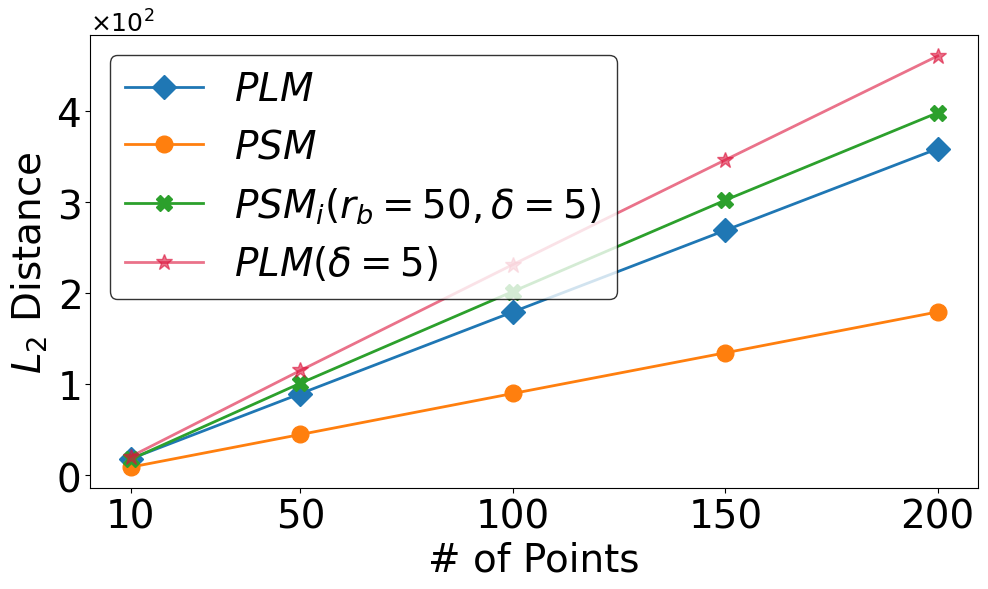

In [91]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker
# Example data (replace with your actual data)
epsilon_values = subset_sizes  #2CA02C


line1 = {'x': epsilon_values, 'y': overall_averages_l2_laplace, 'label': '$PLM$', 'color': '#1F77B4', 'marker': 'D', 'linestyle': 'solid', 'markersize': 12}
line2 = {'x': epsilon_values, 'y': overall_averages_l2_staircase, 'label': '$PSM$', 'color': '#FF7F0E', 'marker': 'o', 'linestyle': 'solid', 'markersize': 12}
line3 = {'x': epsilon_values, 'y': overall_averages_l2_our_bl_50_delta_5, 'label': '$PSM_i (r_b=50, \delta=5)$', 'color': '#2CA02C', 'marker': 'X', 'linestyle': 'solid', 'markersize': 12}
line4 = {'x': epsilon_values, 'y': overall_averages_l2_LaplaceDelta_5_01, 'label': '$PLM ( \delta=5)$', 'color': '#DC143C', 'marker': '*', 'linestyle': 'solid', 'markersize': 12}

#PSMᵢ
# Increase the figure size for better readability
plt.figure(figsize=(10, 6))
# Improved line styles and markers
plt.plot(line1['x'], line1['y'], label=line1['label'], color=line1['color'], marker=line1['marker'], linestyle=line1['linestyle'], linewidth=2,markersize=line1['markersize'])
plt.plot(line2['x'], line2['y'], label=line2['label'], color=line2['color'], marker=line2['marker'], linestyle=line2['linestyle'], linewidth=2,markersize=line1['markersize'])
plt.plot(line3['x'], line3['y'], label=line3['label'], color=line3['color'], marker=line3['marker'], linestyle=line3['linestyle'], linewidth=2,markersize=line1['markersize'])
plt.plot(line4['x'], line4['y'], label=line4['label'], color=line4['color'], marker=line4['marker'], linestyle=line4['linestyle'], linewidth=2,markersize=line1['markersize'], alpha=0.6)


# Log scale for x-axis and setting specific ticks and labels
plt.xlabel('# of Points', fontsize=28)
plt.ylabel('$L_2$ Distance', fontsize=28)
#plt.title('Geolife (Per Point)')
# Log scale for x-axis and setting specific ticks and labels
#plt.xscale('log')
plt.xticks(epsilon_values, labels=[str(val) for val in epsilon_values])
plt.tick_params(axis='both', which='major', labelsize=28)
# Adding legend
legend = plt.legend( fontsize=28, frameon=True)
#plt.legend(loc = 'upper left', fontsize=26)
frame = legend.get_frame()
#frame.set_color('black')  # Set the frame color
frame.set_edgecolor('black')  # Set the border color
frame.set_linewidth(1)  # Set the border width
# Show grid
#plt.grid(True, which="both", ls="--", color='gray', alpha=0.4)
plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.gca().yaxis.get_offset_text().set_size(18)
plt.tight_layout()

pathpng = '/Users/shafizurrahmanseeam/Desktop/ARR/AR_GPS_Sensor_Data/figure/png/ARR_L2Distance_e=1'
plt.savefig(pathpng, dpi=300, bbox_inches='tight')

# # Saving the plot as an SVG
#pathsvg = 'C:\\Users\\ss6365\\Desktop\\11111\\Geolife\\figure\\svg\\Geolife_L2Distance_e=1lower_trace_points'
#plt.savefig(pathsvg, format='svg', bbox_inches='tight')

#plt.gca().xaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

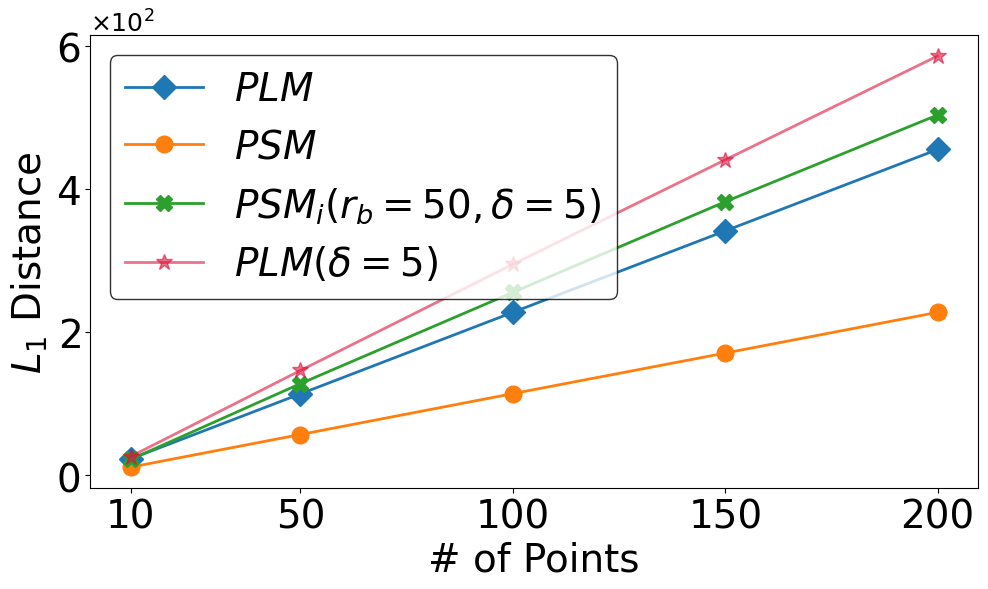

In [92]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker
# Example data (replace with your actual data)
epsilon_values = subset_sizes  #2CA02C


line1 = {'x': epsilon_values, 'y': overall_averages_l1_laplace, 'label': '$PLM$', 'color': '#1F77B4', 'marker': 'D', 'linestyle': 'solid', 'markersize': 12}
line2 = {'x': epsilon_values, 'y': overall_averages_l1_staircase, 'label': '$PSM$', 'color': '#FF7F0E', 'marker': 'o', 'linestyle': 'solid', 'markersize': 12}
line3 = {'x': epsilon_values, 'y': overall_averages_l1_our_bl_50_delta_5, 'label': '$PSM_i (r_b=50, \delta=5)$', 'color': '#2CA02C', 'marker': 'X', 'linestyle': 'solid', 'markersize': 12}
line4 = {'x': epsilon_values, 'y': overall_averages_l1_LaplaceDelta_5_01, 'label': '$PLM ( \delta=5)$', 'color': '#DC143C', 'marker': '*', 'linestyle': 'solid', 'markersize': 12}

#PSMᵢ
# Increase the figure size for better readability
plt.figure(figsize=(10, 6))
# Improved line styles and markers
plt.plot(line1['x'], line1['y'], label=line1['label'], color=line1['color'], marker=line1['marker'], linestyle=line1['linestyle'], linewidth=2,markersize=line1['markersize'])
plt.plot(line2['x'], line2['y'], label=line2['label'], color=line2['color'], marker=line2['marker'], linestyle=line2['linestyle'], linewidth=2,markersize=line1['markersize'])
plt.plot(line3['x'], line3['y'], label=line3['label'], color=line3['color'], marker=line3['marker'], linestyle=line3['linestyle'], linewidth=2,markersize=line1['markersize'])
plt.plot(line4['x'], line4['y'], label=line4['label'], color=line4['color'], marker=line4['marker'], linestyle=line4['linestyle'], linewidth=2,markersize=line1['markersize'], alpha=0.6)


# Log scale for x-axis and setting specific ticks and labels
plt.xlabel('# of Points', fontsize=28)
plt.ylabel('$L_1$ Distance', fontsize=28)
#plt.title('Geolife (Per Point)')
# Log scale for x-axis and setting specific ticks and labels
#plt.xscale('log')
plt.xticks(epsilon_values, labels=[str(val) for val in epsilon_values])
plt.tick_params(axis='both', which='major', labelsize=28)
# Adding legend
legend = plt.legend( fontsize=28, frameon=True)
#plt.legend(loc = 'upper left', fontsize=26)
frame = legend.get_frame()
#frame.set_color('black')  # Set the frame color
frame.set_edgecolor('black')  # Set the border color
frame.set_linewidth(1)  # Set the border width
# Show grid
#plt.grid(True, which="both", ls="--", color='gray', alpha=0.4)
plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.gca().yaxis.get_offset_text().set_size(18)
plt.tight_layout()

pathpng = '/Users/shafizurrahmanseeam/Desktop/ARR/AR_GPS_Sensor_Data/figure/png/ARR_L1Distance_e=1'
plt.savefig(pathpng, dpi=300, bbox_inches='tight')

# # Saving the plot as an SVG
#pathsvg = 'C:\\Users\\ss6365\\Desktop\\11111\\Geolife\\figure\\svg\\Geolife_L2Distance_e=1lower_trace_points'
#plt.savefig(pathsvg, format='svg', bbox_inches='tight')

#plt.gca().xaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

In [93]:
df_laplace5 = pd.read_csv('/Users/shafizurrahmanseeam/Desktop/ARR/AR_GPS_Sensor_Data/Perturbed_10/Laplace/merged_laplace_5.csv')
df_laplace5

  # Add more sizes as needed
averages_l2_laplace = {size: [] for size in subset_sizes}  # To store averages for each subset size
averages_l1_laplace = {size: [] for size in subset_sizes}  # To store averages for each subset size

for identifier, group in df_laplace5.groupby('Identifier'):
    for size in subset_sizes:
        if len(group) >= size:  # Check if the trajectory has enough points
            mean_distance_l2 = group['l2_distance'].iloc[:size].sum()
            averages_l2_laplace[size].append(mean_distance_l2)
            mean_distance_l1 = group['l1_distance'].iloc[:size].sum()
            averages_l1_laplace[size].append(mean_distance_l1)

# Now, calculate the overall average for each subset size across all trajectories
overall_averages_l2_laplace = {size: sum(values)/len(values) if values else None for size, values in averages_l2_laplace.items()}
overall_averages_l1_laplace = {size: sum(values)/len(values) if values else None for size, values in averages_l1_laplace.items()}

# Extracting just the values from the overall_averages dictionary
overall_averages_l2_laplace = list(overall_averages_l2_laplace.values())
overall_averages_l1_laplace = list(overall_averages_l1_laplace.values())
# This will be your list of overall averages
print(overall_averages_l2_laplace)
print(overall_averages_l1_laplace)


[3.61260775107991, 17.999718883907455, 35.81957640392994, 53.64200813912526, 71.53625113992678]
[4.5712303325067385, 22.82991682881449, 45.44693707393865, 68.04550683603598, 90.73162689087746]


In [94]:
df_staircase5 = pd.read_csv('/Users/shafizurrahmanseeam/Desktop/ARR/AR_GPS_Sensor_Data/Perturbed_10/Staircase/merged_staircase_5.csv')
df_staircase5

  # Add more sizes as needed
averages_l2_staircase = {size: [] for size in subset_sizes}  # To store averages for each subset size
averages_l1_staircase = {size: [] for size in subset_sizes}  # To store averages for each subset size

for identifier, group in df_staircase5.groupby('Identifier'):
    for size in subset_sizes:
        if len(group) >= size:  # Check if the trajectory has enough points
            mean_distance_l2 = group['l2_distance'].iloc[:size].sum()
            averages_l2_staircase[size].append(mean_distance_l2)
            mean_distance_l1 = group['l1_distance'].iloc[:size].sum()
            averages_l1_staircase[size].append(mean_distance_l1)

# Now, calculate the overall average for each subset size across all trajectories
overall_averages_l2_staircase = {size: sum(values)/len(values) if values else None for size, values in averages_l2_staircase.items()}
overall_averages_l1_staircase = {size: sum(values)/len(values) if values else None for size, values in averages_l1_staircase.items()}

# Extracting just the values from the overall_averages dictionary
overall_averages_l2_staircase = list(overall_averages_l2_staircase.values())
overall_averages_l1_staircase = list(overall_averages_l1_staircase.values())
# This will be your list of overall averages
print(overall_averages_l2_staircase)
print(overall_averages_l1_staircase)

[1.8136848504696295, 9.140928849054715, 18.218825301104584, 27.30448235563198, 36.41243192219095]
[2.307252090288741, 11.601725592531084, 23.117995323849556, 34.66174324897067, 46.20809833980548]


In [95]:
df_our_bl_50delta5_5 = pd.read_csv('/Users/shafizurrahmanseeam/Desktop/ARR/AR_GPS_Sensor_Data/Perturbed_10/Our_bl_50_delta_5/merged_our_5.csv')
df_our_bl_50delta5_5

  # Add more sizes as needed
averages_l2_our_bl_50_delta_5 = {size: [] for size in subset_sizes}  # To store averages for each subset size
averages_l1_our_bl_50_delta_5 = {size: [] for size in subset_sizes}  # To store averages for each subset size

for identifier, group in df_our_bl_50delta5_5.groupby('Identifier'):
    for size in subset_sizes:
        if len(group) >= size:  # Check if the trajectory has enough points
            mean_distance_l2 = group['l2_distance'].iloc[:size].sum()
            averages_l2_our_bl_50_delta_5[size].append(mean_distance_l2)
            mean_distance_l1 = group['l1_distance'].iloc[:size].sum()
            averages_l1_our_bl_50_delta_5[size].append(mean_distance_l1)

# Now, calculate the overall average for each subset size across all trajectories
overall_averages_l2_our_bl_50_delta_5 = {size: sum(values)/len(values) if values else None for size, values in averages_l2_our_bl_50_delta_5.items()}
overall_averages_l1_our_bl_50_delta_5 = {size: sum(values)/len(values) if values else None for size, values in averages_l1_our_bl_50_delta_5.items()}

# Extracting just the values from the overall_averages dictionary
overall_averages_l2_our_bl_50_delta_5 = list(overall_averages_l2_our_bl_50_delta_5.values())
overall_averages_l1_our_bl_50_delta_5 = list(overall_averages_l1_our_bl_50_delta_5.values())
# This will be your list of overall averages
print(overall_averages_l2_our_bl_50_delta_5)
print(overall_averages_l1_our_bl_50_delta_5)

[8.003938321131765, 62.73167985245811, 124.81723816362557, 185.87716708660645, 240.71770257451536]
[10.332265818762837, 79.36670586666797, 157.77019216702527, 234.40787771479899, 303.16844865288255]


In [96]:
df_laplaceDelta5_5= pd.read_csv('/Users/shafizurrahmanseeam/Desktop/ARR/AR_GPS_Sensor_Data/Perturbed_10/LaplaceDelta5/merged_LaplaceDelta5_5.csv')
df_laplaceDelta5_5

  # Add more sizes as needed
averages_l2_LaplaceDelta_5_01 = {size: [] for size in subset_sizes}  # To store averages for each subset size
averages_l1_LaplaceDelta_5_01 = {size: [] for size in subset_sizes}  # To store averages for each subset size

for identifier, group in df_laplaceDelta5_5.groupby('Identifier'):
    for size in subset_sizes:
        if len(group) >= size:  # Check if the trajectory has enough points
            mean_distance_l2 = group['l2_distance'].iloc[:size].sum()
            averages_l2_LaplaceDelta_5_01[size].append(mean_distance_l2)
            mean_distance_l1 = group['l1_distance'].iloc[:size].sum()
            averages_l1_LaplaceDelta_5_01[size].append(mean_distance_l1)

# Now, calculate the overall average for each subset size across all trajectories
overall_averages_l2_LaplaceDelta_5_01 = {size: sum(values)/len(values) if values else None for size, values in averages_l2_LaplaceDelta_5_01.items()}
overall_averages_l1_LaplaceDelta_5_01 = {size: sum(values)/len(values) if values else None for size, values in averages_l1_LaplaceDelta_5_01.items()}

# Extracting just the values from the overall_averages dictionary
overall_averages_l2_LaplaceDelta_5_01 = list(overall_averages_l2_LaplaceDelta_5_01.values())
overall_averages_l1_LaplaceDelta_5_01 = list(overall_averages_l1_LaplaceDelta_5_01.values())
# This will be your list of overall averages
print(overall_averages_l2_LaplaceDelta_5_01)
print(overall_averages_l1_LaplaceDelta_5_01)

[8.391867626324625, 64.555918481617, 128.9976661794757, 191.83764423151877, 249.19744076704404]
[10.826919905400885, 81.77139075615459, 163.30663454120284, 242.11201909436647, 314.2357252054645]


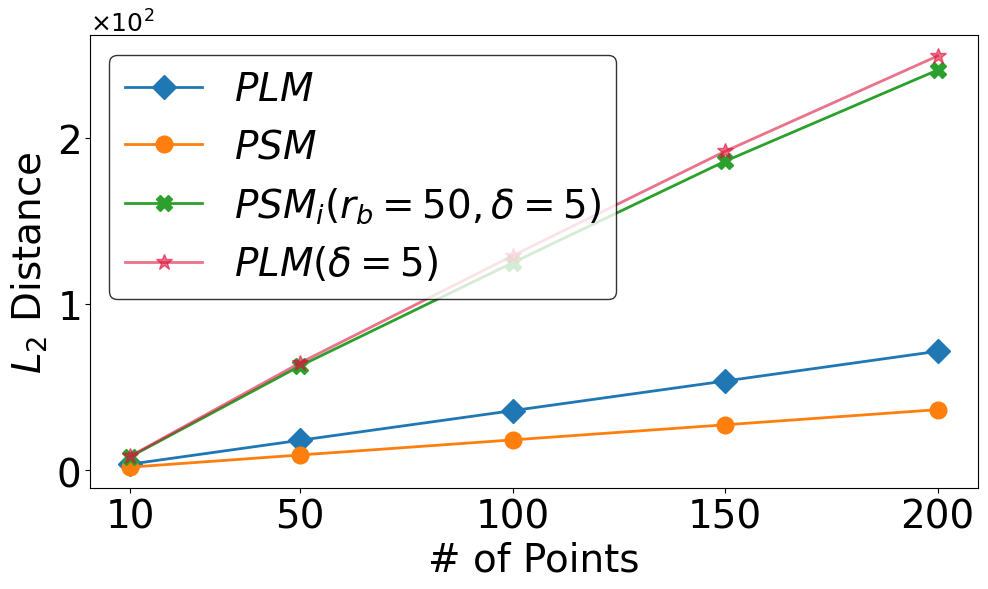

In [97]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker
# Example data (replace with your actual data)
epsilon_values = subset_sizes  #2CA02C


line1 = {'x': epsilon_values, 'y': overall_averages_l2_laplace, 'label': '$PLM$', 'color': '#1F77B4', 'marker': 'D', 'linestyle': 'solid', 'markersize': 12}
line2 = {'x': epsilon_values, 'y': overall_averages_l2_staircase, 'label': '$PSM$', 'color': '#FF7F0E', 'marker': 'o', 'linestyle': 'solid', 'markersize': 12}
line3 = {'x': epsilon_values, 'y': overall_averages_l2_our_bl_50_delta_5, 'label': '$PSM_i (r_b=50, \delta=5)$', 'color': '#2CA02C', 'marker': 'X', 'linestyle': 'solid', 'markersize': 12}
line4 = {'x': epsilon_values, 'y': overall_averages_l2_LaplaceDelta_5_01, 'label': '$PLM ( \delta=5)$', 'color': '#DC143C', 'marker': '*', 'linestyle': 'solid', 'markersize': 12}

#PSMᵢ
# Increase the figure size for better readability
plt.figure(figsize=(10, 6))
# Improved line styles and markers
plt.plot(line1['x'], line1['y'], label=line1['label'], color=line1['color'], marker=line1['marker'], linestyle=line1['linestyle'], linewidth=2,markersize=line1['markersize'])
plt.plot(line2['x'], line2['y'], label=line2['label'], color=line2['color'], marker=line2['marker'], linestyle=line2['linestyle'], linewidth=2,markersize=line1['markersize'])
plt.plot(line3['x'], line3['y'], label=line3['label'], color=line3['color'], marker=line3['marker'], linestyle=line3['linestyle'], linewidth=2,markersize=line1['markersize'])
plt.plot(line4['x'], line4['y'], label=line4['label'], color=line4['color'], marker=line4['marker'], linestyle=line4['linestyle'], linewidth=2,markersize=line1['markersize'], alpha=0.6)


# Log scale for x-axis and setting specific ticks and labels
plt.xlabel('# of Points', fontsize=28)
plt.ylabel('$L_2$ Distance', fontsize=28)
#plt.title('Geolife (Per Point)')
# Log scale for x-axis and setting specific ticks and labels
#plt.xscale('log')
plt.xticks(epsilon_values, labels=[str(val) for val in epsilon_values])
plt.tick_params(axis='both', which='major', labelsize=28)
# Adding legend
legend = plt.legend( fontsize=28, frameon=True)
#plt.legend(loc = 'upper left', fontsize=26)
frame = legend.get_frame()
#frame.set_color('black')  # Set the frame color
frame.set_edgecolor('black')  # Set the border color
frame.set_linewidth(1)  # Set the border width
# Show grid
#plt.grid(True, which="both", ls="--", color='gray', alpha=0.4)
plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.gca().yaxis.get_offset_text().set_size(18)
plt.tight_layout()

pathpng = '/Users/shafizurrahmanseeam/Desktop/ARR/AR_GPS_Sensor_Data/figure/png/ARR_L2Distance_e=5'
plt.savefig(pathpng, dpi=300, bbox_inches='tight')

# # Saving the plot as an SVG
#pathsvg = 'C:\\Users\\ss6365\\Desktop\\11111\\Geolife\\figure\\svg\\Geolife_L2Distance_e=1lower_trace_points'
#plt.savefig(pathsvg, format='svg', bbox_inches='tight')

#plt.gca().xaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

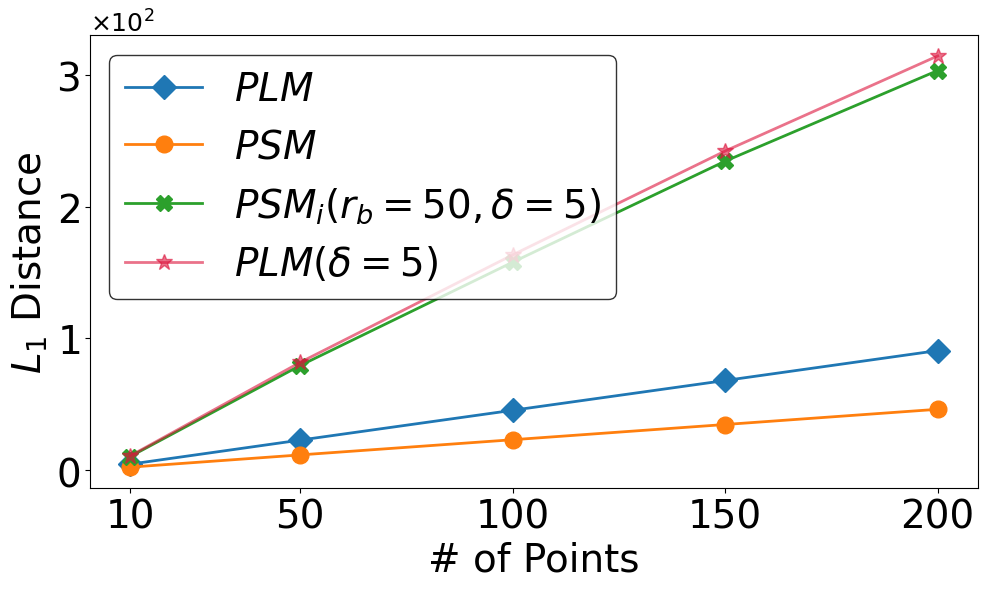

In [98]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker
# Example data (replace with your actual data)
epsilon_values = subset_sizes  #2CA02C


line1 = {'x': epsilon_values, 'y': overall_averages_l1_laplace, 'label': '$PLM$', 'color': '#1F77B4', 'marker': 'D', 'linestyle': 'solid', 'markersize': 12}
line2 = {'x': epsilon_values, 'y': overall_averages_l1_staircase, 'label': '$PSM$', 'color': '#FF7F0E', 'marker': 'o', 'linestyle': 'solid', 'markersize': 12}
line3 = {'x': epsilon_values, 'y': overall_averages_l1_our_bl_50_delta_5, 'label': '$PSM_i (r_b=50, \delta=5)$', 'color': '#2CA02C', 'marker': 'X', 'linestyle': 'solid', 'markersize': 12}
line4 = {'x': epsilon_values, 'y': overall_averages_l1_LaplaceDelta_5_01, 'label': '$PLM ( \delta=5)$', 'color': '#DC143C', 'marker': '*', 'linestyle': 'solid', 'markersize': 12}

#PSMᵢ
# Increase the figure size for better readability
plt.figure(figsize=(10, 6))
# Improved line styles and markers
plt.plot(line1['x'], line1['y'], label=line1['label'], color=line1['color'], marker=line1['marker'], linestyle=line1['linestyle'], linewidth=2,markersize=line1['markersize'])
plt.plot(line2['x'], line2['y'], label=line2['label'], color=line2['color'], marker=line2['marker'], linestyle=line2['linestyle'], linewidth=2,markersize=line1['markersize'])
plt.plot(line3['x'], line3['y'], label=line3['label'], color=line3['color'], marker=line3['marker'], linestyle=line3['linestyle'], linewidth=2,markersize=line1['markersize'])
plt.plot(line4['x'], line4['y'], label=line4['label'], color=line4['color'], marker=line4['marker'], linestyle=line4['linestyle'], linewidth=2,markersize=line1['markersize'], alpha=0.6)


# Log scale for x-axis and setting specific ticks and labels
plt.xlabel('# of Points', fontsize=28)
plt.ylabel('$L_1$ Distance', fontsize=28)
#plt.title('Geolife (Per Point)')
# Log scale for x-axis and setting specific ticks and labels
#plt.xscale('log')
plt.xticks(epsilon_values, labels=[str(val) for val in epsilon_values])
plt.tick_params(axis='both', which='major', labelsize=28)
# Adding legend
legend = plt.legend( fontsize=28, frameon=True)
#plt.legend(loc = 'upper left', fontsize=26)
frame = legend.get_frame()
#frame.set_color('black')  # Set the frame color
frame.set_edgecolor('black')  # Set the border color
frame.set_linewidth(1)  # Set the border width
# Show grid
#plt.grid(True, which="both", ls="--", color='gray', alpha=0.4)
plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.gca().yaxis.get_offset_text().set_size(18)
plt.tight_layout()

pathpng = '/Users/shafizurrahmanseeam/Desktop/ARR/AR_GPS_Sensor_Data/figure/png/ARR_L1Distance_e=5'
plt.savefig(pathpng, dpi=300, bbox_inches='tight')

# # Saving the plot as an SVG
#pathsvg = 'C:\\Users\\ss6365\\Desktop\\11111\\Geolife\\figure\\svg\\Geolife_L2Distance_e=1lower_trace_points'
#plt.savefig(pathsvg, format='svg', bbox_inches='tight')

#plt.gca().xaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
#plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))